In [4]:
!pip install textblob
!python -m textblob.download_corpora

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [2]:
# 📝 Amazon Reviews Sentiment Analysis

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Reviews.csv")  # make sure the file is in the same folder
df = df[['Score','Text']].dropna()
df.head(100000)


,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
99995,5,I just love it and will buy another box when I...
99996,4,My late father in law used to have a rating sy...
99997,5,This is my favorite brand of Korean ramen. It ...
99998,4,"I do like these noodles although, to say they ..."


In [6]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['Polarity'] = df['Text'].apply(get_sentiment)

def categorize(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(categorize)
df.head()


,Score,Text,Polarity,Sentiment
0,5,I have bought several of the Vitality canned d...,0.450000,Positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,-0.033333,Neutral
2,4,This is a confection that has been around a fe...,0.133571,Positive
3,2,If you are looking for the secret ingredient i...,0.166667,Positive
4,5,Great taffy at a great price. There was a wid...,0.483333,Positive


C:\Users\prash\AppData\Local\Temp\ipykernel_12936\2086493003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


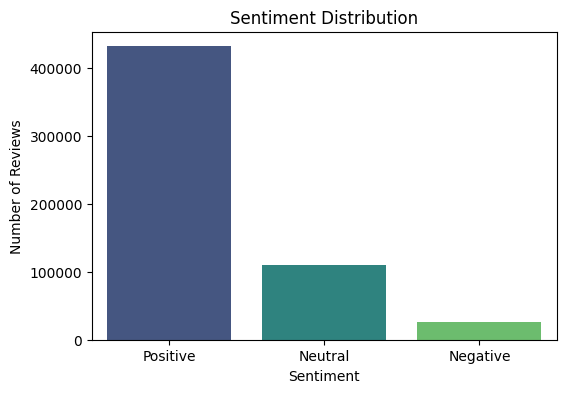

In [7]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.show()
